In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
# Step 1: Load the dataset
url = "Online Retail.xlsx"
data = pd.read_excel(url)

In [13]:
# Step 2: Data Cleaning
# Remove missing values
data = data.dropna()
# Remove negative or zero quantity and price
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
# Create a TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [15]:
# Step 3: Feature Engineering
# Aggregate customer spending
grouped_data = data.groupby('CustomerID').agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()


In [16]:
# Step 4: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data[['TotalPrice', 'Quantity']])

In [17]:
# Step 5: Determine optimal K using Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

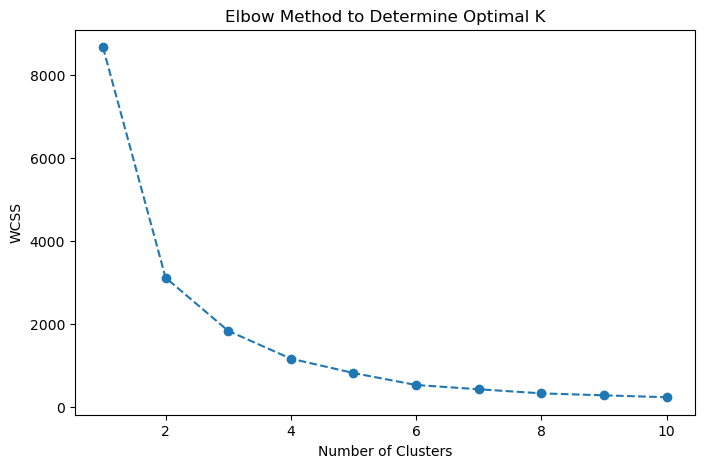

In [18]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [19]:
# Step 6: Apply K-Means Clustering
optimal_k = 3  # Assume from elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
grouped_data['Cluster'] = clusters


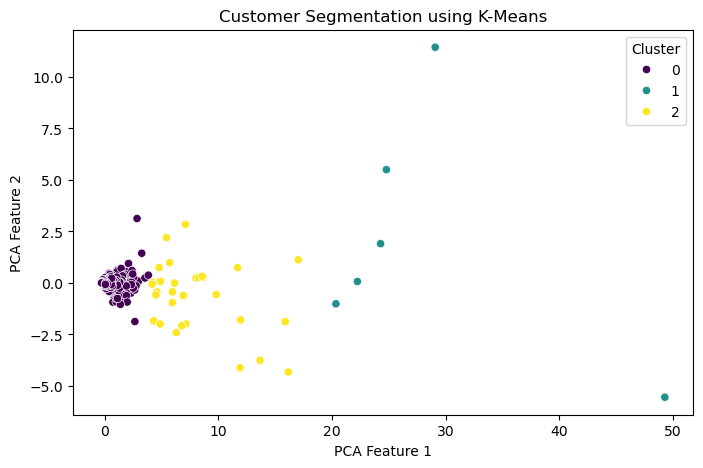

In [20]:
# Step 7: Visualizing Clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=grouped_data['Cluster'], palette='viridis')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Customer Segmentation using K-Means')
plt.show()

In [21]:
# Step 8: Cluster Insights
print(grouped_data.groupby('Cluster').agg({'TotalPrice': ['mean', 'sum'], 'Quantity': ['mean', 'sum']}))

            TotalPrice                   Quantity         
                  mean          sum          mean      sum
Cluster                                                   
0          1458.105519  6272769.944    844.112506  3631372
1        195271.033333  1171626.200  94944.666667   569668
2         48900.392000  1467011.760  32225.733333   966772
